<a href="https://colab.research.google.com/github/yadavneha22/FDS_LABwork/blob/main/faceandeye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install serial

In [3]:

import cv2
import numpy as np
import serial
import imutils


In [4]:
face_detect = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_alt.xml')
open_eyes = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascade_eye.xml')
right_eyes = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascade_righteye_2splits.xml')
left_eyes = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascade_lefteye_2splits.xml')

In [5]:
from google.colab.patches import cv2_imshow

In [11]:
frame = cv2.imread('/content/drive/MyDrive/Colab Notebooks/download (1).jpeg')
frame = imutils.resize(frame, width=450)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
face = face_detect.detectMultiScale(gray,1.2,2)

2


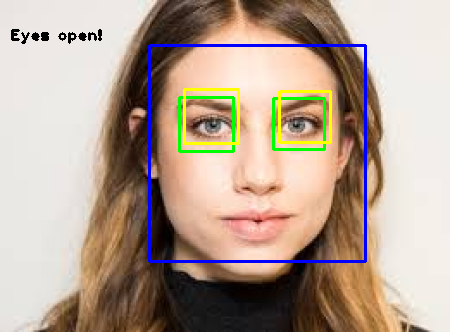

In [12]:
for (x,y,w,h) in face:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_color = frame[y:y+h,x:x+w]
    roi_gray = frame[y:y+h,x:x+w]
    oeyes = open_eyes.detectMultiScale(roi_gray,1.3,30)
    reyes = right_eyes.detectMultiScale(roi_gray,1.3,20)
    leyes = left_eyes.detectMultiScale(roi_gray,1.3,20)
    print(len(oeyes))       
    for (oex,oey,oew,oeh) in oeyes:
      cv2.rectangle(roi_color,(oex,oey),(oex+oew,oey+oeh),(0,255,0),2)
    for (rex,rey,rew,reh) in reyes:
      cv2.rectangle(roi_color,(rex,rey),(rex+rew,rey+reh),(0,0,255),2)
    for (lex,ley,lew,leh) in leyes:
      cv2.rectangle(roi_color,(lex,ley),(lex+lew,ley+leh),(0,255,255),2)
 
    if len(leyes)!=0:
      if len(oeyes) == 0:
        cv2.putText(frame, 
                    "Eyes close!", (10, 40), 
                    cv2.FONT_HERSHEY_PLAIN, 1,
                    (0,0,0),2)
      else:
        cv2.putText(frame, 
                    "Eyes open!", (10, 40), 
                    cv2.FONT_HERSHEY_PLAIN, 1,
                    (0,0,0),2)
    
    if len(reyes)!=0:
     if len(oeyes) == 0:
       cv2.putText(frame, 
                    "Eyes close!", (10,40), 
                    cv2.FONT_HERSHEY_PLAIN, 1,
                    (0,0,0),2)
     else:
       cv2.putText(frame, 
                    "Eyes open!", (10, 40), 
                    cv2.FONT_HERSHEY_PLAIN, 1,
                    (0,0,0),2)
       
cv2_imshow(frame)
k= cv2.waitKey(10) & 0xff
if k== ord('q'):
  #break
  cv2.release()
  cv2.DestroyAllWindows()